# Standard deviation and standard error

## About this page

This is a [Jupyter Notebook](https://jupyter.org).  It can be run as an
interactive demo, or you can read it as a web page.

You don't need to understand the code on this page, the text will tell you what
the code is doing.

You can also [run this demo
interactively](https://mybinder.org/v2/gh/matthew-brett/bio145/master?filepath=standard_error_of_mean.ipynb).

## Code to start

In [1]:
# Code to get set up.  If you are running interactively, you can execute
# this cell by pressing Shift and Enter at the same time.
# Libraries for arrays, plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

## Back to the standard error of the mean

Let's say we have a pond with a million frogs, having weights around 10g.

We could imagine that, if we could measure the weights of all one million
frogs, they might look like this:

In [2]:
number_of_frogs = 1000000
population = np.random.normal(10, 2, size=number_of_frogs)

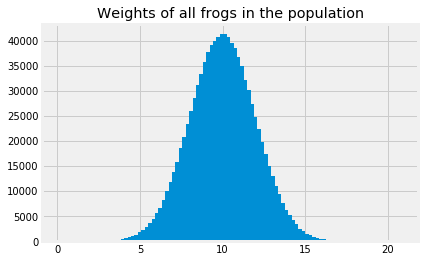

In [3]:
plt.hist(population, bins=100);
plt.title('Weights of all frogs in the population');

The *population mean* is the mean of all these one million values:

In [4]:
population_mean = np.mean(population)
population_mean

10.001876728449798

The *population standard deviation* is the standard deviation of one million
values:

In [5]:
population_std = np.std(population)
population_std

1.996298880833061

Now we take a random sample of 500 values from this population:

In [6]:
# Take a random sample size 500 from the population
sample = np.random.choice(population, size=500, replace=False)

Here's a histogram of this *sample* of 500 values:

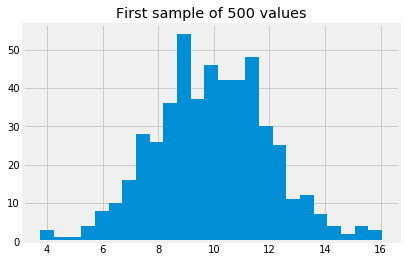

In [7]:
plt.hist(sample, bins=25)
plt.title('First sample of 500 values');

The *sample mean* is the mean of values *in the sample*:

In [8]:
np.mean(sample)

9.944476246334636

## Where's the error?

Notice that the sample mean is not exactly the same as the population mean.
When we take our sample, by chance we may have picked up more light frogs than
average, or more heavy frogs.

The *error* of the sample mean, is the difference between the mean of the sample, and the mean of the whole population:

In [9]:
# Here's the error!
np.mean(population) - np.mean(sample)

0.057400482115161466

## The standard deviation in the sample

The *sample standard deviation* is the standard deviation of the sample values
from the sample mean:

In [10]:
np.std(sample)

2.069525835709467

## One error per sample

If we take another sample, it won't have the same mean as the population, for
the reasons above.  Also, it won't have the same mean as the first sample, for
the same reason:

In [11]:
sample_2 = np.random.choice(population, size=500, replace=False)

In [12]:
# Mean of the second sample
np.mean(sample_2)

10.01183320074511

This sample does not have the same mean as the population, and so it has its
own *error*:

In [13]:
# Here's the error for this sample
np.mean(population) - np.mean(sample_2)

-0.009956472295312935

## Compare frog to frog, mean to mean

If we draw one frog at random from the pond, then the weight of that frog will
be somewhat random, with weights around 10 being more common (the population
mean), and weights around 8 or 12 being less common.

## The distribution of errors for sample means

If we draw one sample of 500 frogs at random, the mean will also be somewhat
random, with a mean weight of around 10 being more common (the population
mean), and mean weights of around 9.8 or 10.2 being less common.

Put another way, each *sample* gives one *error*.  If I take many samples, and get the error for each one, I can look at the *distribution* of the errors.

For example, here I am drawing 1000 samples from the population.  For each
sample, I calculate the mean and store it.  After I have done that, I have 1000
sample means.

In [14]:
# We will collect the sample means in a list
sample_means = []
# Repeat the following statements 1000 times:
for i in range(1000):
    # Take a new random sample
    new_sample = np.random.choice(population, size=500, replace=False)
    # Record the mean of the sample in the list.
    sample_means.append(np.mean(new_sample))

## The sampling distribution

Remember the mean of the sample will vary a little bit either side of 10 (the
population mean).   So our 1000 means from our 1000 samples will form a
*distribution*.  This is the *sampling distribution* of the mean - that is,
the distribution of the mean when we take random samples of 500 from this
population.

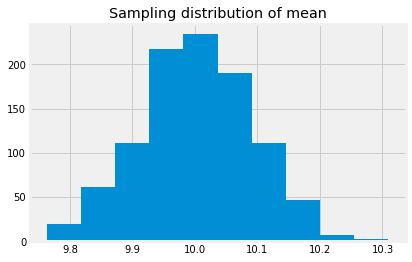

In [15]:
plt.hist(sample_means)
plt.title("Sampling distribution of mean");

The mean of these means (the mean of the sampling distribution) will be very
near the population mean:

In [16]:
np.mean(sample_means)

10.003648960210276

The sampling distribution has a spread either side of the mean, given by its
standard deviation:

In [17]:
np.std(sample_means)

0.08910712705074006

## At last, the standard error

The standard deviation of the sample means, is the *standard error of the mean* (SEM).

Of course, we can't generally take thousands of samples, and measure their
means, to get the sampling distribution of the mean, as we have here.  If we
could, we could just measure its standard deviation, as we did above. But it
turns out that we can use some simple mathematics to estimate the standard
deviation of the sampling distribution, using the standard deviation of
a single sample.  The formula turns out to be:

$$
SEM = s / \sqrt{n}
$$

Here $s$ is the standard deviation of the sample, and $n$ is the number of observations in the sample.  We found out above, that the standard deviation of the sampling distribution was:

In [18]:
np.std(sample_means)

0.08910712705074006

Our estimate from the SEM calculation above is:

In [19]:
SEM = np.std(sample) / np.sqrt(500)
SEM

0.09255200899676859

So, the SEM estimate is pretty close to the standard deviation we see when
taking lots of samples.